# SLU12 - Feature Engineering (aka Real World Data): Exercises notebook

## 1 About the data

In this exercise we will be using a dataset from Zomato, adapted from [here](https://github.com/MehtaShruti/Zomato-Restaurants-Recommendations).

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import category_encoders as ce
%matplotlib inline
import hashlib

data = pd.read_csv('data/zomato.csv')
data.head()

,Restaurant Name,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Jahanpanah,Agra,"North Indian, Mughlai",850,No,No,3,3.9,Yellow,Good,140
1,Rangrezz Restaurant,Agra,"North Indian, Mughlai",700,No,No,2,3.5,Yellow,Good,71
2,Time2Eat - Mama Chicken,Agra,North Indian,500,No,No,2,3.6,Yellow,Good,94
3,Chokho Jeeman Marwari Jain Bhojanalya,Agra,Rajasthani,400,No,No,2,4.0,Green,Very Good,87
4,Pinch Of Spice,Agra,"North Indian, Chinese, Mughlai",1000,No,No,3,4.2,Green,Very Good,177


The fields in this dataset have the following meaning:
* **Restaurant Name** - name of the restaurant.
* **City** - name of the city where the restaurant belong.
* **Cuisines** - type of cuisine served on the restaurant.
* **Average Cost for two** - self explanatory(as when scraped).
* **Has Table booking** - Yes or No.
* **Has Online delivery** - Yes or No.
* **Price Range** - prices range from 1 to 4.
* **Agregate rating** - overall user rating of the app (as when scraped).
* **Rating color** - rating in color: White/ Red/ Orange/ Yeallow/ Green/ Dark Green.
* **Rating text** - rating in text values: Not rated/ Poor / Average / Good/ Very Good/ Excellent.
* **Votes** - number of user reviews for the restaurant (as when scraped).

The first thing we want to do is to check the dtypes of our features.

In [2]:
data.dtypes

Restaurant Name          object
City                     object
Cuisines                 object
Average Cost for two      int64
Has Table booking        object
Has Online delivery      object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

## 2 Category dtype in pandas

### Exercise 1: Convert fields into category dtype (graded)

The fields `Cuisines` and `Rating text` are of dtype `object` but can be converted into dtype `category`, as explained in the Learning Notebook. Moreover:
* `Cuisines` is a *nominal* categorical field, that is, without any meaningful order;
* `Rating text` is an *ordinal* categorical field, as its values has a natural order.

In the following exercise, convert both fields into dtype `category` and, in the case of the field `Rating text`, assign a natural order for its categories.

_Note:_ Regarding the "natural order" for the field `Rating text`, use the order shown in the field meaning. 

In [14]:
def convert_categorical_features(X, nominal_feat='Cuisines', ordinal_feat='Rating text'):

    X_s = X.copy()
    
    ## convert nominal feature to dtype 'category'
    X_s[nominal_feat] = X_s[nominal_feat].astype('category')
    
    ## create list of ordered categories for ordinal feature
    ordered_cats = ['Not rated', 'Poor' ,'Average' , 'Good' ,'Very Good','Excellent']
    
    ## convert ordinal feature to dtype 'category'
    X_s[ordinal_feat] = X_s[ordinal_feat].astype('category')
    
    
    ## Assign natural order to ordinal feature
    X_s[ordinal_feat] =X_s[ordinal_feat].cat.set_categories(ordered_cats, ordered=True)

    
    

    return X_s

In [15]:
"""Check that the solution is correct."""
X_cat_conv = convert_categorical_features(data)
hash1_1='edb2cd3b74c999af70f0b7054990f2072dc6e10a847af6ed05954b8994b730fe'
assert hashlib.sha256(str(X_cat_conv['Cuisines'].dtype).encode('utf-8')).hexdigest() == hash1_1, print('Not correct, try again.')
hash1_2='edb2cd3b74c999af70f0b7054990f2072dc6e10a847af6ed05954b8994b730fe'
assert hashlib.sha256(str(X_cat_conv['Rating text'].dtype).encode('utf-8')).hexdigest() == hash1_2, print('Not correct, try again.')
hash1_3='ad9ebc2393e9f9e4f08a12c8cfc48bce795e73a329c6518d22f45b6318615763'
assert hashlib.sha256(str(X_cat_conv).encode('utf-8')).hexdigest() == hash1_3, print('Not correct, try again.')
hash1_4='83c8b46c983b9fcf3fb7863409b97fb5ce13c3c2cf49ecf1a17e5af799b9444a'
assert hashlib.sha256(str(X_cat_conv['Rating text']).encode('utf-8')).hexdigest() == hash1_4, print('Not correct, try again.')

### Exercise 2: Encode binary field (graded)

In this exercise, encode the **target variable** (column `Has Table booking`) to be `1` when a restaurant `Has Table booking` and to `0` when it doesn't.
Do this exercise using the `map` method.

In [29]:
def encode_binary_field(f):

    f_e = f.copy()
    
    ## create a dictionary mapping the current values to int values
    enconding_map = {'Yes': 1, 'No': 0}
    ## change target using the mapping
    f_e = f_e.map(enconding_map)
   
    
    return f_e

In [30]:
"""Check that the solution is correct."""
f_encoded = encode_binary_field(data['Has Table booking'])
hash2_1='5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91b46729d73a27fb57e9'
assert hashlib.sha256(str(f_encoded[123]).encode('utf-8')).hexdigest() == hash2_1, print('Not correct, try again.')
hash2_2='6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b'
assert hashlib.sha256(str(f_encoded[2004]).encode('utf-8')).hexdigest() == hash2_2, print('Not correct, try again.')
hash2_3='0ffe1abd1a08215353c233d6e009613e95eec4253832a761af28ff37ac5a150c'
assert hashlib.sha256(str(sum(f_encoded.fillna(0))).encode('utf-8')).hexdigest() == hash2_3, print('Not correct, try again.')

### Exercise 3: Discretize `Votes` field (graded)

The field `Votes` is a continuous field, with a distribution which is, not surprisingly, very skewed to the right (remember *skewness* from SLU04?).


The field 'Votes' ranges from 0 to 10934


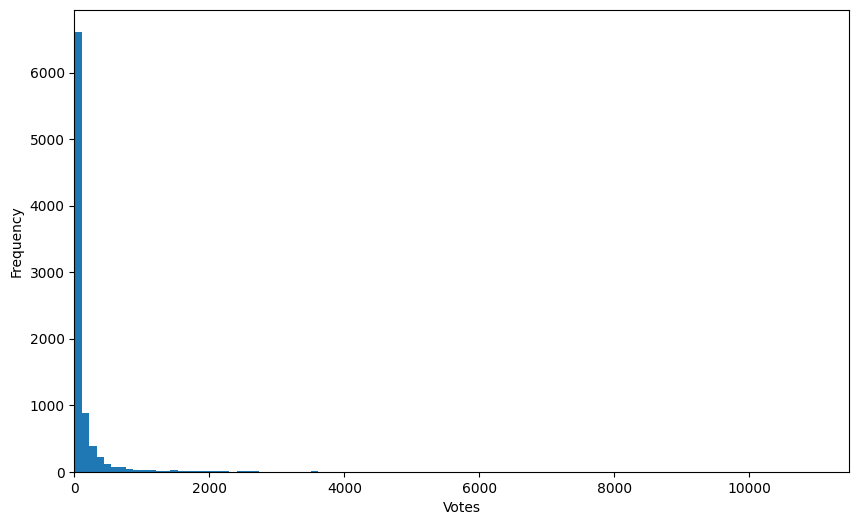

In [31]:
data['Votes'].plot.hist(bins=100, figsize=(10,6));
plt.xlim(0);
plt.xlabel('Votes');
print("The field 'Votes' ranges from", data['Votes'].min(), "to", data['Votes'].max())

We will deal with the skewness in a bit. Let's first discretize this field in two ways:
* create a new field called `discrete_votes` which is the discretization of the `Votes` field, such that the range is between 0 and 49 and the original instances are uniformly distributed;
* create a new field called `binary_votes` which is the binarization of the `Votes` field, such that amounts smaller than `100` become `0` and amounts equal or greater than `100` become 1.

Use `sklearn` transformers in this exercise.

In [45]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer

def discretize_votes(X):

    X_a = X.copy()
    
    ## create new column `discrete_amount` using suitable transformer
    # save column as a dataframe, as required by the transformer
    X = X_a[['Votes']]
    binner = KBinsDiscretizer(n_bins=50, encode='ordinal', strategy='uniform')
    binner.fit(X)
    X_a['discrete_votes'] = binner.transform(X)
    

    ## create new column `binary_amount` using suitable transformer
    binarizer = Binarizer(threshold = 100)
    binarizer.fit(X)
    X_a['binary_votes'] = binarizer.transform(X)
 
    
    return X_a

In [48]:
"""Check that the solution is correct."""
X_votes = discretize_votes(data)
hash3_1='e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027aa13515e4f3884bb6b'
assert hashlib.sha256(str(X_votes.discrete_votes.nunique()).encode('utf-8')).hexdigest() == hash3_1, print('Not correct, try again.')
hash3_2='7665a1519d9063ed9aad694cbe7537f7e2f6cc47d6957096ecd117af918bed77'
assert hashlib.sha256(str(X_votes.discrete_votes.max()).encode('utf-8')).hexdigest() == hash3_2, print('Not correct, try again.')
hash3_3='8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e7b6f554b06f75550d7'
assert hashlib.sha256(str(X_votes.loc[123, 'discrete_votes']).encode('utf-8')).hexdigest() == hash3_3, print('Not correct, try again.')
hash3_4='d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35'
assert hashlib.sha256(str(X_votes.binary_votes.nunique()).encode('utf-8')).hexdigest() == hash3_4, print('Not correct, try again.')
hash3_5='6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b'
assert hashlib.sha256(str(X_votes.binary_votes.max()).encode('utf-8')).hexdigest() == hash3_5, print('Not correct, try again.')
hash3_6='5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91b46729d73a27fb57e9'
assert hashlib.sha256(str(X_votes.loc[123, 'binary_votes']).encode('utf-8')).hexdigest() == hash3_6, print('Not correct, try again.')

Check the distribution of the two new fields you just calculated:

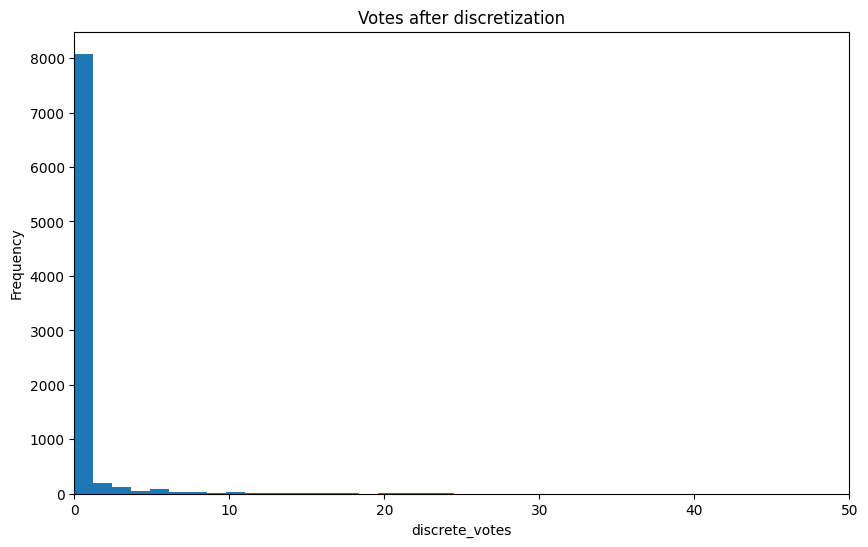

In [49]:
X_votes.discrete_votes.plot.hist(bins=40, figsize=(10,6));
plt.xlim(0,50);
plt.xlabel('discrete_votes');
plt.title('Votes after discretization');

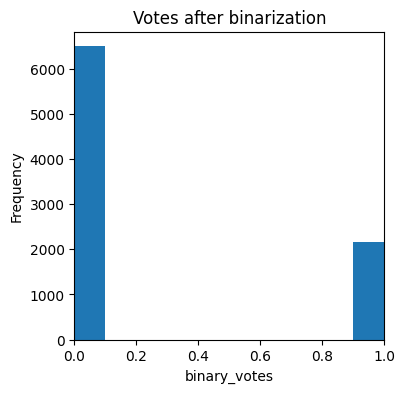

In [50]:
X_votes.binary_votes.plot.hist(figsize=(4,4));
plt.xlim(0,1);
plt.xlabel('binary_votes');
plt.title('Votes after binarization');

### Exercise 4: Scale `Votes` field (graded)

In the Learning Notebook, you also learned that numerical data can be scaled. 

In this exercise, let's scale the field `Votes` in three different ways and compare the results:
* create a new field called `minmaxscaled_votes` which scales uniformly the `Votes` field such that the values range from 0 to 1;
* create a new field called `standardscaled_votes` which scales the `Votes` field such that the *mean* is 0 and the standard deviation is 1;
* create a new field called `robustscaled_votes` which scales the `Votes` field such that the *median* is 0 and it is scaled according to the Interquartile Range.

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

def scale_votes(X1):

    X_s = X1.copy()
    
    ## create new column `minmaxscaled_reviews` using suitable transformer
    X = X_s[['Votes']]
    
    minmaxscaler = MinMaxScaler(feature_range=(0,1))
    minmaxscaler.fit(X)
    X_s['minmaxscaled_votes'] = minmaxscaler.transform(X)
    ## create new column `standardscaled_reviews` using suitable transformer
    standardscaler = StandardScaler()
    standardscaler.fit(X)
    X_s['standardscaled_votes'] =standardscaler.transform(X)
    ## create new column `robustscaled_reviews` using suitable transformer
    robustscaler = RobustScaler()
    robustscaler.fit(X)
    X_s['robustscaled_votes'] =  robustscaler.transform(X)
    
    
    
    return X_s

In [62]:
"""Check that the solution is correct."""
X_scaled = scale_votes(data)

assert X_scaled.minmaxscaled_votes.min() == 0 , print('Not correct, try again.')
assert X_scaled.minmaxscaled_votes.max() == 1, print('Not correct, try again.')
assert math.isclose(X_scaled.minmaxscaled_votes.mean(), 0.0125, abs_tol = 0.0001), print('Not correct, try again.')
assert math.isclose(X_scaled.loc[1234, 'minmaxscaled_votes'], 0.03576 , abs_tol = 0.00001), print('Not correct, try again.')
assert math.isclose(X_scaled.standardscaled_votes.min(), -0.321, abs_tol = 0.001), print('Not correct, try again.')
assert math.isclose(X_scaled.standardscaled_votes.max(), 25.23, abs_tol = 0.01), print('Not correct, try again.')
assert math.isclose(X_scaled.standardscaled_votes.mean(), -2.874e-17, abs_tol = 0.01e-10), print('Not correct, try again.')
assert math.isclose(X_scaled.loc[1234, 'standardscaled_votes'], 0.592, abs_tol = 0.01), print('Not correct, try again.')
assert math.isclose(X_scaled.robustscaled_votes.min(), -0.25, abs_tol = 0.0001), print('Not correct, try again.')
assert math.isclose(X_scaled.robustscaled_votes.max(), 113.65, abs_tol = 0.01), print('Not correct, try again.')
assert math.isclose(X_scaled.robustscaled_votes.mean(), 1.1793, abs_tol = 0.001), print('Not correct, try again.')
assert math.isclose(X_scaled.loc[1234, 'robustscaled_votes'], 3.82292, abs_tol = 0.001), print('Not correct, try again.')

Plot the distributions for the new fields you just calculated:

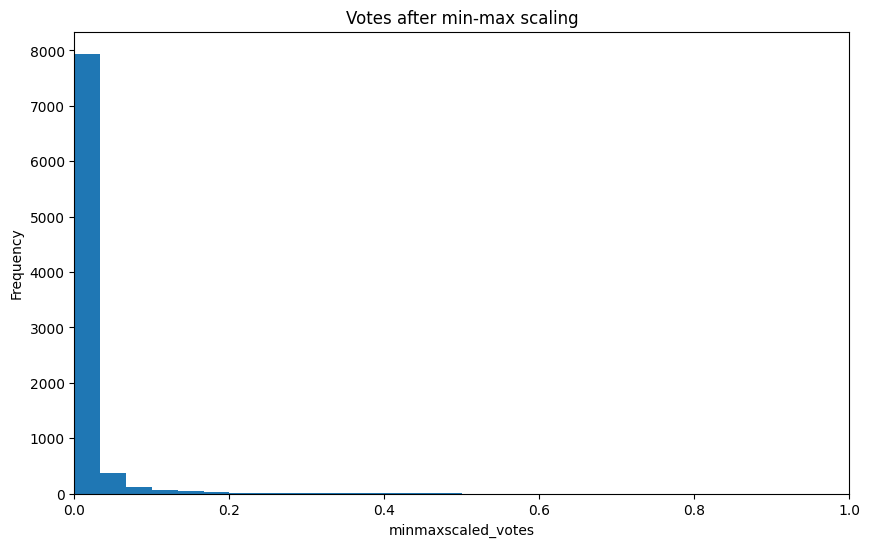

In [63]:
X_scaled.minmaxscaled_votes.plot.hist(bins=30, figsize=(10,6));
plt.xlim(0,1);
plt.xlabel('minmaxscaled_votes');
plt.title('Votes after min-max scaling');

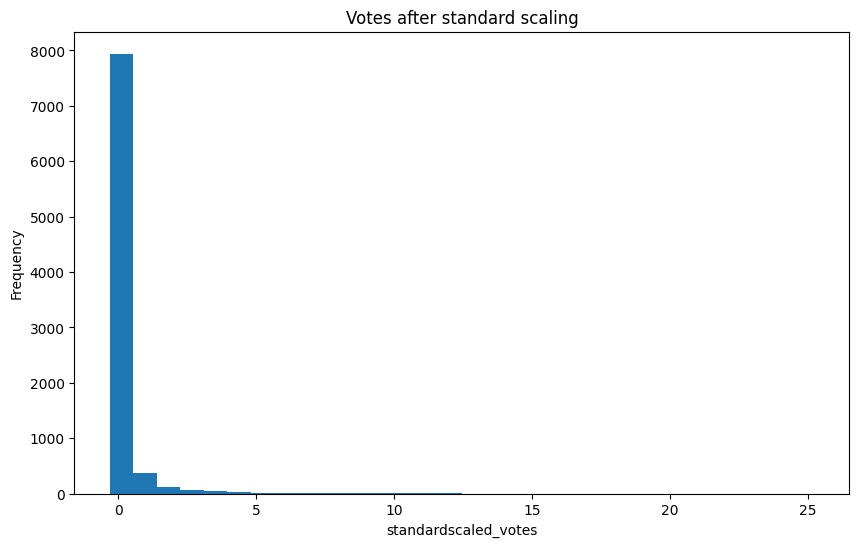

In [64]:
X_scaled.standardscaled_votes.plot.hist(bins=30, figsize=(10,6));
plt.xlabel('standardscaled_votes');
plt.title('Votes after standard scaling');

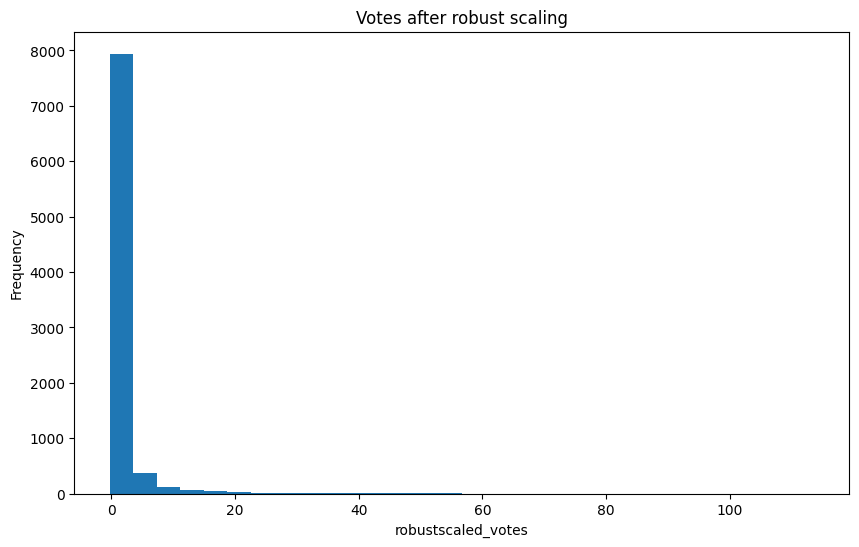

In [65]:
X_scaled.robustscaled_votes.plot.hist(bins=30, figsize=(10,6));
plt.xlabel('robustscaled_votes');
plt.title('Votes after robust scaling');

### Exercise 5: Ordinal encode `Rating text` feature

Finally, let's deal with the categorical features.

First, create a new field called `rating_text_encoded` which is the result of ordinal encoding of the `Rating text` feature.

In [75]:
def encode_rating_text(data):

    X_r = data.copy()
    
    X = X_r[['Rating text']]
    # create new column using suitable transformer
    ordinalencoder = ce.ordinal.OrdinalEncoder()
    ordinalencoder.fit(X)
    X_r['rating_text_encoded'] = ordinalencoder.transform(X)
   
    
    return X_r

In [77]:
"""Check that the solution is correct."""
X_rating_text = encode_rating_text(data)
hash5_1='bc2229666b96007e875c5f62897ee5b7648db2baa5fabf3e771afac323afbd57'
assert hashlib.sha256(str(X_rating_text.rating_text_encoded.dtype).encode('utf-8')).hexdigest() == hash5_1, print('Not correct, try again.')
hash5_2='6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b'
assert hashlib.sha256(str(X_rating_text.rating_text_encoded.min()).encode('utf-8')).hexdigest() == hash5_2, print('Not correct, try again.')
hash5_3='e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683'
assert hashlib.sha256(str(X_rating_text.rating_text_encoded.max()).encode('utf-8')).hexdigest() == hash5_3, print('Not correct, try again.')
hash5_4='d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35'
assert hashlib.sha256(str(X_rating_text.loc[1234, 'rating_text_encoded']).encode('utf-8')).hexdigest() == hash5_4, print('Not correct, try again.')

### Exercise 6: One-hot encode type feature

Finally, perform a one-hot encoding of the `Cuisines` feature. Pay attention to the following points:
* return the original DataFrame `X`, but with the `Cuisines` feature replaced by the new ones resulting from the one-hot encoding;
* make sure the new features have names of the form `Cuisines_<value>`, where `<value>` is the category being indicated by that feature.

In [110]:
def encode_cuisines(X):

    X_t = X.copy()
    
    ohe = ce.one_hot.OneHotEncoder(use_cat_names=False)


    c = X_t[['Cuisines']]


    ohe.fit(c)


    X_t['Cuisines'] = ohe.transform(c)
    
    
    
    return X_t

In [135]:
def encode_cuisines(X):

    X_t = X.copy()
    
    ohe = ce.one_hot.OneHotEncoder(use_cat_names=True)


    c = X_t[['Cuisines']]


    ohe.fit(c)


    X_t['Cuisines'] = ohe.transform(c)
    
    
    
    return X_t

In [136]:
"""Check that the solution is correct."""
X_cuisines = encode_cuisines(data)
assert X_cuisines.shape[1] > 10, print('Not correct, try again.')
hash6_1='454f63ac30c8322997ef025edff6abd23e0dbe7b8a3d5126a894e4a168c1b59b'
assert hashlib.sha256(str(X_cuisines.Cuisines_Mughlai.sum()).encode('utf-8')).hexdigest() == hash6_1, print('Not correct, try again.')
hash6_2='5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91b46729d73a27fb57e9'
assert hashlib.sha256(str(X_cuisines.loc[1234, 'Cuisines_North Indian, Chinese, Continental']).encode('utf-8')).hexdigest() == hash6_2, print('Not correct, try again.')
hash6_3='5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91b46729d73a27fb57e9'
assert hashlib.sha256(str(X_cuisines.loc[4322, 'Cuisines_North Indian, European']).encode('utf-8')).hexdigest() == hash6_3, print('Not correct, try again.')

AttributeError: 'DataFrame' object has no attribute 'Cuisines_Mughlai'

----